> Data is the new oil.


Data scientists collect data from a dizzying variety of sources and in a wide range of formats. Some examples include:  

* Scraping raw data from public databases online
* Collecting log and usage information from the customers of a website
* Downloading social media user patterns and behavior
* Gathering sensory data from embedded devices and sensors

It is the data scientist's job to transform this data that can come in all shapes and sizes into something that is reliable, clean, and useful for deriving insights and taking action. 

Transforming and cleaning data is so foundational to the data scientist's role that you will often hear this claim: **"Data scientists spend 50% to 80% of their time cleaning and manipulating data, and the rest building and furnishing models."** We're not sure where the exact time split lies, but this statement definitely illustrates the primacy of data cleaning in the data scientist's workflow. 

![data_cleaning.png](assets/data_cleaning.png)

The above figure depicts our current phase of the EDA process. The topics we will cover in this checkpoint are:

* Data cleaning defined
* Detecting potential problems with the data
* Dealing with missing data

Of the various problems you might have with cleaning data, we emphasize missing data in this checkpoint because it's one of the most common problems in the real world. To demonstrate, we will continue working on the YouTube dataset from the previous checkpoint. 

# What is data cleaning?

Data cleaning is the process of detecting problems in the data, then using a series of techniques to deal with them. To build on the "data is the new oil" analogy presented above, we can think of the data cleaning process as similar to refining oil. 

We don't use crude oil in our cars, but instead oil that has been processed and refined into something suitable for our cars. "Dirty" data can indeed poison our models just as crude oil would damage the engines of our cars! This risk explains why data scientists spend so much time on data cleaning and exploration. 

As a "byproduct" of our "data refining" process, we also come to know the data better. Again, the best ally a data scientist can have is the data itself. So, the more time we spend with the data, the cleaner we get it, *and* the better we know it, the more we can get out of it. It's a win-win deal! 


# Problems associated with the data

Data science.... *what could possibly go wrong?* We have mentioned several times that data cleaning involves identifying potential problems with the data. What might those be? Below are some potential problems in your data: 

* Duplicate entries for the same identity
* Data that is irrelevant to the task at hand
* Structural problems, such as integers stored as text, or inconsistently formatted date fields
* Extreme values and anomalies in the data that we can't quite explain. These values might "poison" our analysis for reasons that we will discuss in detail in the next checkpoint.
* Missing values in the data. They reduce the number of data points we can work with, which means we can lose some valuable information. The focus of this checkpoint is on dealing with missing values. 

Detecting problems in the data is the first step of any data cleaning process. Let's get started. 

# Detecting problems in the data

Your ability to detect problems in the data is directly related to your familiarity with the data. In order to get to know the data better, we need to investigate it, and to do that we need some tools. 

These tools include programming packages, visualization libraries, and statistical methods. Earlier in this course, we introduced Pandas and Matplotlib modules as well as the foundations of statistics. We'll use that toolkit to detect problems in our data. But before that, let's introduce another useful Python library called **SQLAlchemy**. SQLAlchemy is a popular Python library that's used for accessing databases and querying them. Throughout this module, we'll use it to access Thinkful's database to load the data we'll use in our examples and in the assignments. The first thing to do before using it is to install it. You can install SQLAlchemy library from your terminal (or command prompt) by running the following command:

```bash
pip install SQLAlchemy
```

You may also need to run:

```bash
pip install psycopg2-binary
```

After that you can start to use it by importing the relevant modules from it. If you want to dig deeper into it, you can read its documentation [here](https://www.sqlalchemy.org/).


In [9]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [10]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from youtube',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

If you look at the code above, you'll notice that we accessed Thinkful's database by using some credentials and information about the server like its ip address and the port of the database. All these informations are passed into the `create_engine()` method of SQLAlchemy as parameters. After that, we called the `read_sql_query()` method of Pandas by giving the query string and the connection that we established by calling the `create_engine()` method of SQLAlchemy as parameters. Pandas' `read_sql_query()` method returns a dataframe as a result of the sql query we run. Notice that after we're done with the database, we close the connection by:

```python
engine.dispose()
```

We should always close the connections after we finish our work with the database as it's a best practice for avoiding wasting our computers' and database server's resources.

# Know your data

The first thing to do when searching our data is to investigate the types of columns in our dataset. Recall from the previous checkpoint that we used Pandas' `.info()` to reveal the types of variables in our dataset. Let's see the output of the `.info()` function again:

In [11]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


The output states we have 6 columns and 5,000 rows. Among the columns, only *Video views* seems to be integer, and the rest appear to be text. However, as we explained in the previous checkpoint, this is misleading. 

Further investigation in that checkpoint revealed that *Video Uploads* and *Subscribers* are also numeric. We will not repeat that analysis here but rather focus on the missing values in the variables and how to treat them.

# How to detect missing values

Pandas includes a function called `.isnull()` which returns `True` if an element has no value and otherwise returns (`None`) or `False` for each element in a DataFrame. 

Calling this function on our DataFrame, we get the below:

In [12]:
youtube_df.isnull()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


What's the deal here? It appears from the output as if our dataset contains no missing values, but we know from our discussion in the last checkpoint that this is not the case. All we can say is that we need to delve into our data and carefully analyze it.

This discrepancy arises in how `.isnull()` counts a "missing" record. The record has to be truly *blank* to be flagged as `True`. In our dataset, missing values are represented with two dashes (`--`) rather than left as truly blank. 

This is a common scenario with real-world datasets, so the question emerges: **How do we find missing values, when they might not be left blank**? Unfortunately, there is no "one-size-fits-all" answer to this question. All we can say is that we need to explore our data and carefully analyze it.

One thing we *can* do is to look at all unique values in a variable to spot those which might be designated as a missing value. However, this would only be effective if the number of observations in our dataset is low or if there are few unique values in a variable. 

For example, we have 5,000 data points in our YouTube dataset. This data frame will likely produce a reasonable, if slightly cumbersome, list of unique values to visually inspect. However, if we had 5 *million* observations, it might be infeasible to visually inspect what is wrong with the values.

In the previous checkpoint, we saw that Pandas provides us the  `.nunique()` function on DataFrames to get the *count* of the unique values in each column. To list *all* unique values in each column of our DataFrame, we can call the Pandas `.unique()` function. Let's look at the unique values for each column of our YouTube dataset:


In [13]:
for column_name in youtube_df.columns:
    print("Unique values in column {} are: {}".format(column_name, youtube_df[column_name].unique()))

Unique values in column Rank are: ['1st' '2nd' '3rd' ... '4,998th' '4,999th' '5,000th']
Unique values in column Grade are: ['A++ ' 'A+ ' 'A ' '\xa0 ' 'A- ' 'B+ ']
Unique values in column Channel name are: ['Zee TV' 'T-Series' 'Cocomelon - Nursery Rhymes' ... 'Mastersaint'
 'Bruce McIntosh' 'SehatAQUA']
Unique values in column Video Uploads are: ['82757' '12661' '373' ... '1735' '706' '3475']
Unique values in column Subscribers are: ['18752951' '61196302' '19238251' ... '3265735' '32990' '21172']
Unique values in column Video views are: [20869786591 47548839843  9793305082 ...   311758426    14563764
    73312511]


As you can see, looking for a missing value alternative is like looking for a needle in a haystack! Rather than combing through these massive lists, let's hack a solution of our own using data types to our advantage. 

For example, the *Video Uploads* and *Subscribers* variables appear to be numeric. So, let's convert these fields to numeric—the values that we *can't* convert to float will likely be the problematic values. 

Let's try it: 

In [14]:
# print all values that cannot be converted to float
for column_name in ["Video Uploads", "Subscribers"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in youtube_df["Video Uploads"]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Video Uploads
--
--
--
--
--
--
These are the problematic values for the variable: Subscribers
--
--
--
--
--
--


As we can see, the missing values in these two columns appeared to be stored as `--`. Note that there may be some trailing spaces around `--`. 

Let's convert these problem records to empty strings and then convert the variables to float:

In [15]:
# replace "--" values to empty strings

youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

We can check that *Video Uploads and Subscribers* columns are of type *float* now:

In [16]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    4994 non-null float32
Subscribers      4613 non-null float32
Video views      5000 non-null int64
dtypes: float32(2), int64(1), object(3)
memory usage: 195.4+ KB


Now, let's call the `.isnull()` method again to check for missing values:

In [17]:
youtube_df.isnull()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


We can see some `True` values (check row 17).  So far, so good! To get a sense of the magnitude of missing values, let's calculate the percentages of the missing values in all columns:

In [18]:
youtube_df.isnull().sum()*100/youtube_df.isnull().count()

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

It appears that everything is in order—we identified and fixed the missing values that lurked in *Video Uploads* and *Subscribers*. However, let's be sure we haven't overlooked other missing values. Take, for example, the *Grade* field. This is a categorical variable, so let's print the frequencies for each value: 


In [19]:
youtube_df.Grade.value_counts()

B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64

Check the last row. It appears that we have empty string values which include trailing spaces. These extra spaces mean that they don't show up when we count the missing values! Just because a record *looks* missing to you, doesn't mean it is to Pandas!

Let's convert these records to `np.nan` and then check whether our changes took effect:

In [20]:
youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)

youtube_df.Grade.unique()

array(['A++', 'A+', 'A', nan, 'A-', 'B+'], dtype=object)

It appears from the `nan` included in this list of unique values that we have now properly identified the missing values in the *Grade* column. 

## Approaches to handling missing values

Dealing with missing values is a complex topic that could be an entire module (and more) in itself. In general, though, we have two options in dealing with missing values.

1. **Disregarding the rows with missing values**: Simply tossing affected rows should be avoided unless we can reasonably believe that we're not losing significant information in these records. 

Each observation in a dataset carries some information and that information could be invaluable to our analysis. However, if we still have abundant data points even after removing these records, this might be the safest approach to take. If you're dealing with tens of thousands of records, for example, and fewer than a dozen have missing values, continue with the analysis. It should also be mentioned that sometimes filling in the missing values (see next step) alters the results of our analysis, and we're better off excluding them entirely.  

2. **Filling the missing values with some unharmful values**: This is generally the preferred and more common approach in dealing with missing values for data science. By replacing the missing values with some other value, we keep all data points in place, and we can beneift from the information these records provide.

## Filling in the missing values in a continuous variable

Continuous variables can take an unlimited number of different values. So how do we choose what to put in place of the missing ones? We will use statistics to decide on an appropriate value. Common approaches include filling in missing values of a variable with the **mean**, the **median** or the **mode** of that variable. This is called missing value **imputation**. 

Recall that each of these statistics is a measure of central tendency. This means that by filling in the missing values with these statistics, we try to put values that are representative of the central tendency such that they will not adversely impact our analysis.

Pandas conveniently offers the `.fillna()` function to replace missing values in a column with another value. Let's replace the missing values in *Video Uploads* and *Subscribers* with their respective variable means:

In [21]:
youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

In [22]:
youtube_df.isnull().sum()*100/youtube_df.count()

Rank             0.000000
Grade            0.120144
Channel name     0.000000
Video Uploads    0.000000
Subscribers      0.000000
Video views      0.000000
dtype: float64

Another popular method for filling in the missing values is called **interpolation**. The basic idea here is to populate missing values using representative values from similar rows. For example, if we have one missing value, we could take the average of its two closest neighboring rows and assign that value in place of the missing one. There are several interpolation techniques such as *linear*, *quadratic*, *cubic*, and so forth. Choosing the right interpolation technique depends on the data and the data generation process.

Interpolation is a common approach, especially with time series data. If we expect continuity in a variable that evolves over time, then we can use interpolation to make use of that continuity. In this sense, interpolation requires a meaningful ordering of the observations and a trend in the ordered data. Because of these unique conditions, you should be careful in applying interpolation to nonordered data as it may lead to erroneous values. You can find more information on interpolation on this [Wikipedia article](https://en.wikipedia.org/wiki/Interpolation).

Applying interpolation is quite easy with Pandas' `.interpolate()` function. The function is outside the scope of this checkpoint, but you can read more about it in the Pandas [the official documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html).

## Missing values in a categorical variable

Filling in missing values for categorical variables is slightly more involved than it is for continuous variables. That is because we can't use a measure of central tendency here like we did for continuous variables. Instead, we can follow two strategies:

1. We can create a new category for the missing values like **other** or **unknown**.

2. We can try to find a suitable category among the existing ones and put that category in place of the missing values. How do we establish the suitable category? One way is to use the most common category. However, more complicated approaches are also possible. For example, in our YouTube data, the *Grade* variable categorical. We also know that the channels are in an ordinal rank. So, if we have a missing value in *Category*, we can fill it in with the category of the next-ranked channel. Let's do this in our dataset:

In [23]:
# fill in missing values in Category with the the value of the next highest-ranked channel's category

grade_list = youtube_df.Grade

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]
        
youtube_df["Grade"].unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)

## Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above. 

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_missing_values/solution.ipynb).

In [147]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)
df = pd.DataFrame(df)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [148]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [149]:
df.isnull().sum() / len(df) * 100.00

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

#### Check missing pattern (by rows)
- Looking at the heatmap of all the missing values in the data frame, we can tell there are specific rows not having most of the values. I want to drop these rows since they wouldn't provide much information.

#### Check column by column
- The Census Bureau's data could be replaced by the mean. 
- Enrollment records only have missing values less then 10%, we can use mean to replace easily. 
- Average scores have more than half missing values, depends on the field we interest, but I would prefer to get rid of these columns. 

In [150]:
df = df.drop(['PRIMARY_KEY'], axis = 1)

       STATE  YEAR    ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0    ALABAMA  1992       NaN      2678885.0         304177.0      1659028.0   
52   ALABAMA  1993  727716.0      2827391.0         331409.0      1729295.0   
104  ALABAMA  1994  730004.0      2970223.0         331823.0      1850894.0   
157  ALABAMA  1995  727480.0      3367437.0         328957.0      2161366.0   
209  ALABAMA  1996  735912.0      3365113.0         334858.0      2138717.0   

     LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0         715680.0          2653798.0                1481703.0   
52        766687.0          2833433.0                1564558.0   
104       787506.0          3103266.0                1697593.0   
157       877114.0          3353363.0                1851700.0   
209       891538.0          3572283.0                1987018.0   

     SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                        735036.0                NaN   
52              

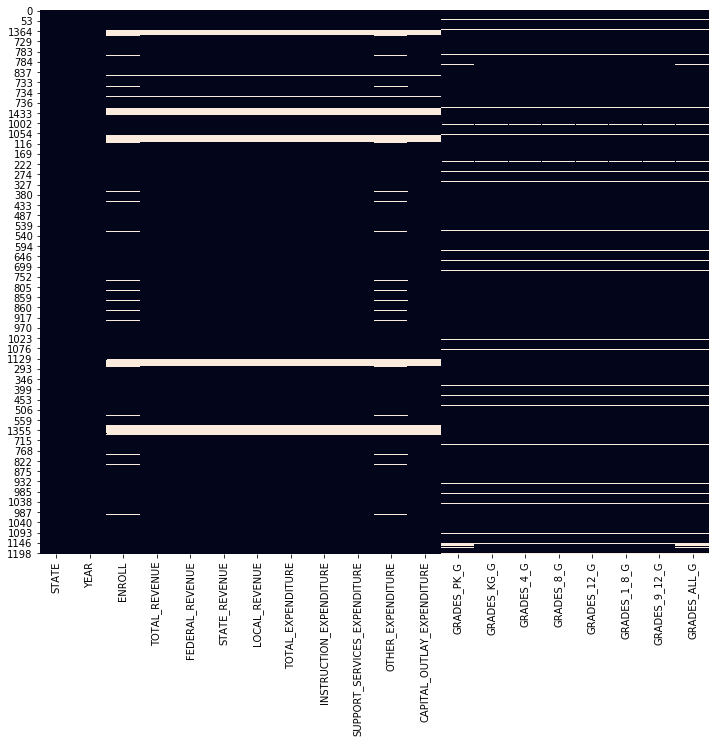

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sort = df.sort_values(by=['STATE', 'YEAR'])

print(df_sort.head())

fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_sort.isnull(), cbar=False)
plt.show()

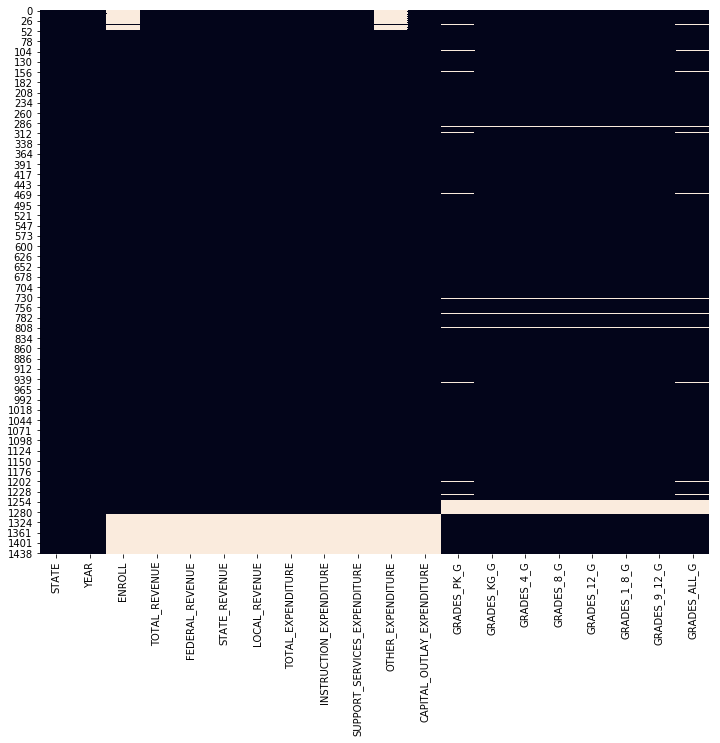

In [169]:
# Dropping the rows contains missing value count larger than 16 
df = df[(df.isnull().sum(axis = 1)) < 16].copy()
df = df.loc[:, ["STATE", "YEAR", "ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
                    "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
                    "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                    "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
                    "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
                    "GRADES_9_12_G", "GRADES_ALL_G"]]
df_2 = df.copy()

# check the plot again
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_2.isnull(), cbar=False)
plt.show()

In [170]:
# Filling rest of the NAs with States' mean
col_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
            "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
            "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
            "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
            "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
            "GRADES_9_12_G", "GRADES_ALL_G"]

for i in col_list: 
    df_2[i] = df_2.groupby(['STATE'])[i].transform(lambda x: x.fillna(x.mean()))
    
for i in col_list: 
    df_2[i].fillna(df_2[i].mean(), inplace = True)
    
df_2.isnull().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

## 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [171]:
# Filling rest of the NAs with years' mean
df_3 = df.copy()

for i in col_list: 
    df_3[i] = df_3.groupby(['YEAR'])[i].transform(lambda x: x.fillna(x.mean()))
    
for i in col_list: 
    df_3[i].fillna(df_3[i].mean(), inplace = True)

df_3.isnull().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

## 4. This time, fill in the missing values using interpolation (extrapolation).¶

In [173]:
df_4 = df.copy()

df_4 = df_4.interpolate(method='linear', limit_direction='forward', axis=0)

for i in col_list: 
    df_4[i].fillna(df_3[i].mean(), inplace = True)

df_4.isnull().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

## 5. Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?

In [174]:
for col in col_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([df[col], df_2[col],
                     df_3[col], df_4[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.381000e+03  1.381000e+03  1.381000e+03
mean   9.159308e+05  9.159969e+05  9.156466e+05  9.600799e+05
std    1.065280e+06  1.025333e+06  1.004962e+06  1.022129e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  2.820880e+05  2.858360e+05  2.845530e+05
50%    6.483130e+05  7.074360e+05  7.372230e+05  7.250270e+05
75%    1.014528e+06  9.856900e+05  9.630710e+05  1.283493e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.381000e+03   1.381000e+03   1.381000e+03
mean    9.092082e+06   9.092082e+06   9.045668e+06   1.016530e+07
std     1.174519e+07   1.130722e+07   1.132845e+07   1.193570e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.332695e+06   2.332

       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.330000e+03   1.381000e+03   1.381000e+03   1.381000e+03
mean    2.526666e+05   2.533308e+05   2.526666e+05   2.455740e+05
std     3.090560e+05   3.091528e+05   3.032914e+05   3.059030e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.713250e+04   5.781500e+04   5.986000e+04   5.092500e+04
50%     1.712105e+05   1.721850e+05   1.768120e+05   1.635110e+05
75%     2.924560e+05   2.933990e+05   2.894210e+05   2.902190e+05
max     2.013687e+06   2.013687e+06   2.013687e+06   2.013687e+06
Statistics for columns: GRADES_ALL_G
       GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G
count  1.319000e+03  1.381000e+03  1.381000e+03  1.381000e+03
mean   8.024415e+05  8.029912e+05  8.022042e+05  7.806347e+05
std    9.707031e+05  9.778199e+05  9.486547e+05  9.570262e+05
min    7.254000e+03  7.254000e+03  7.254000e+03  7.254000e+03
25%    1.810650e+05  1.794600e+05  1.931970e+05  1.702100e+

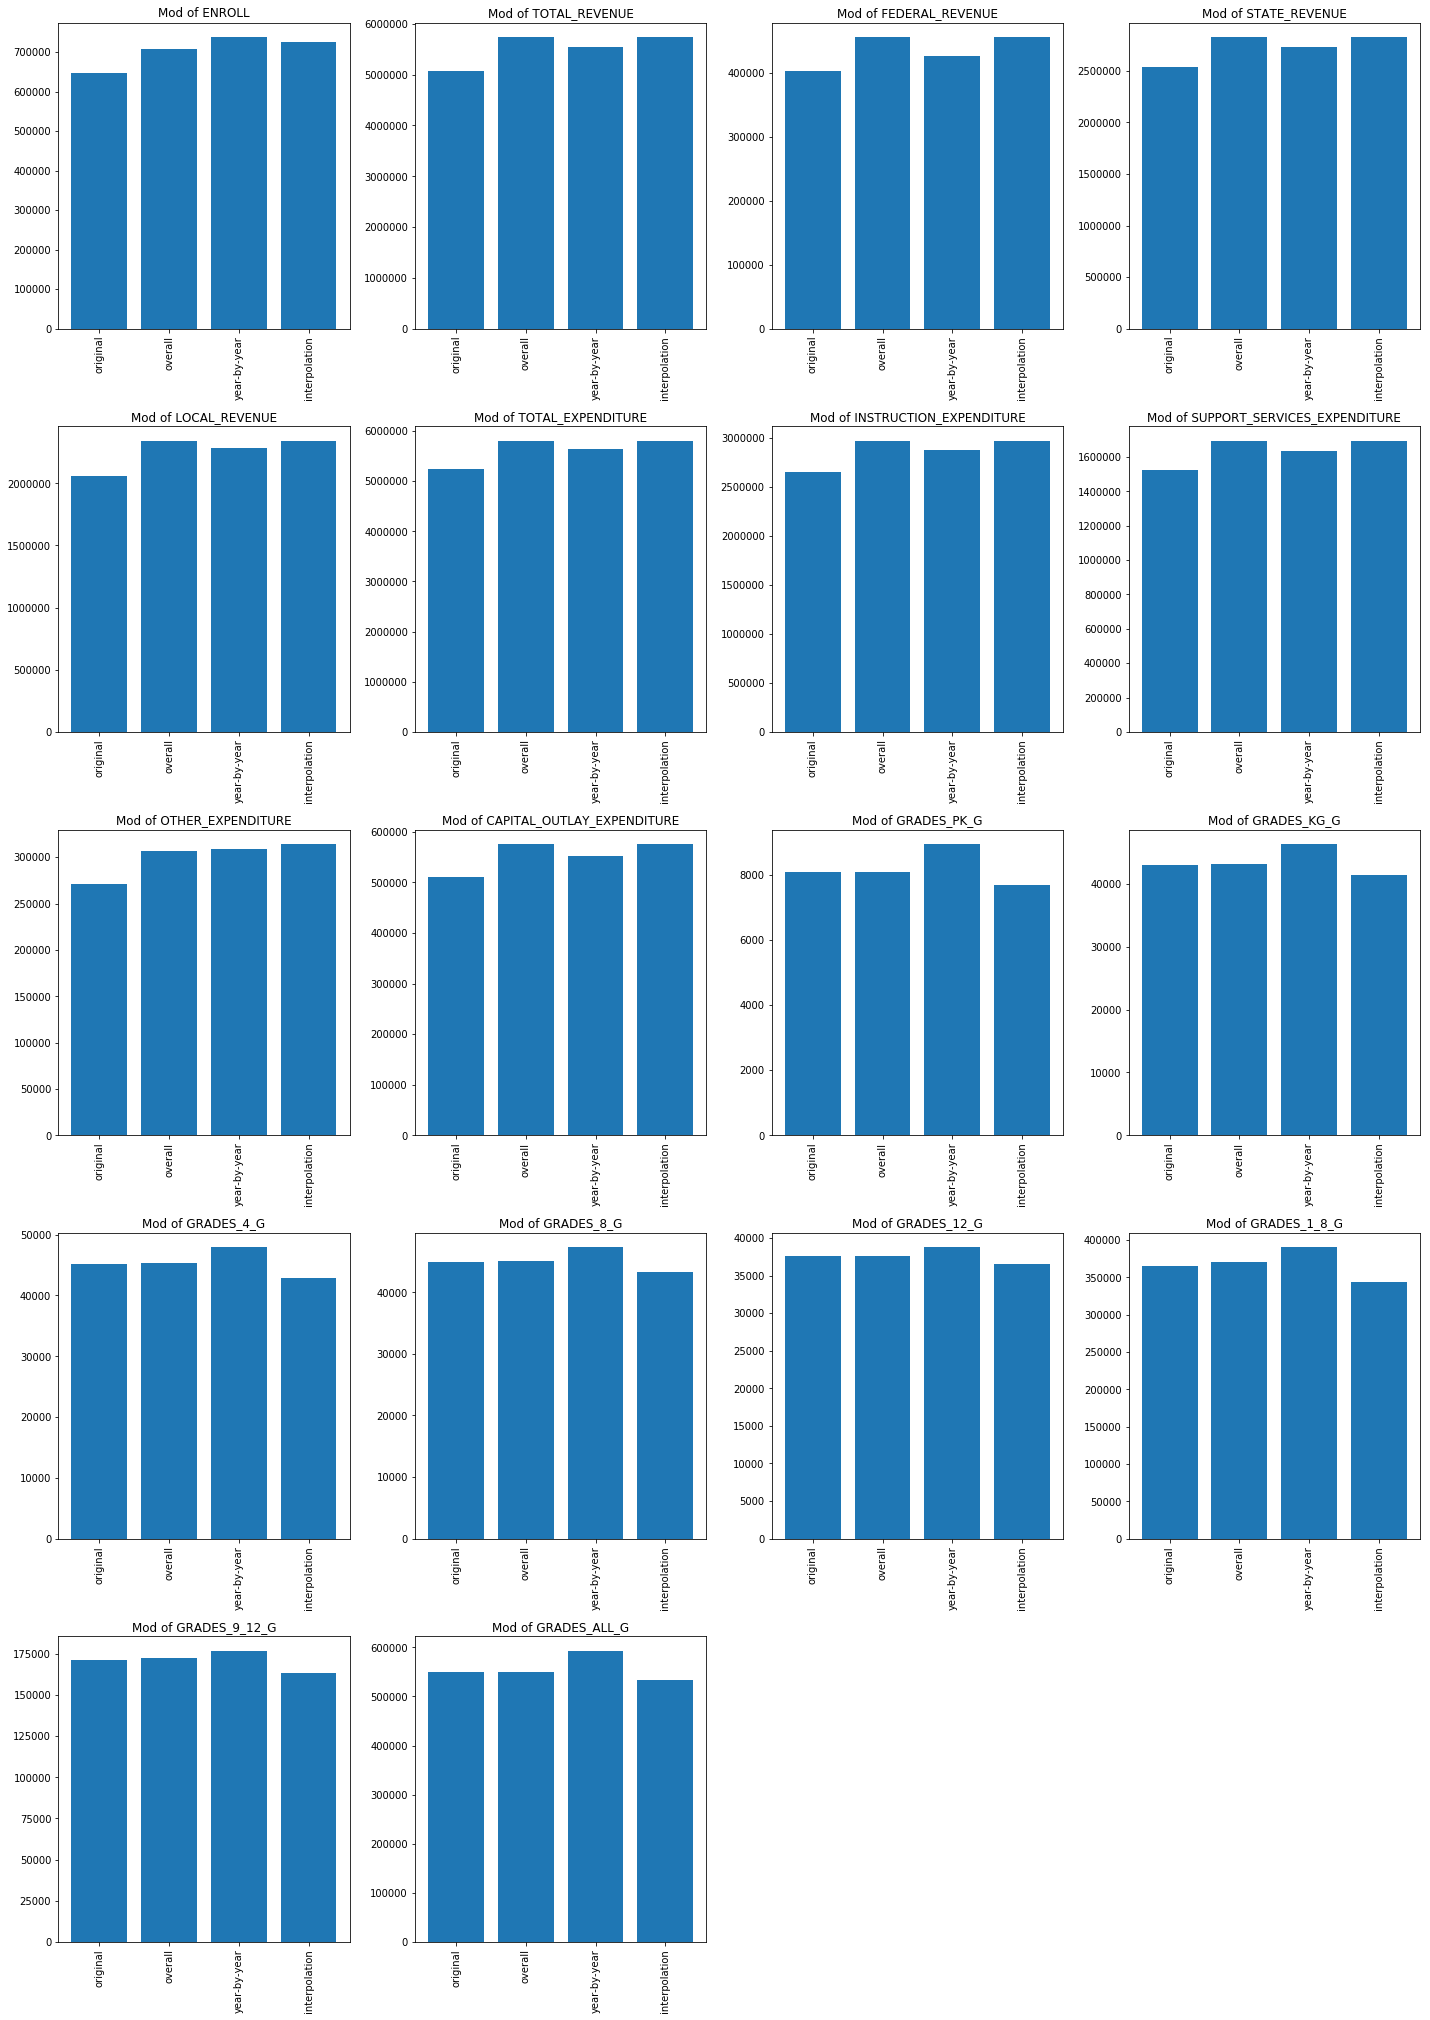

In [175]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(col_list):
    
    plt.subplot(len(col_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], pd.concat([df[col], df_2[col], df_3[col], df_4[col]], axis=1).median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()